In [1]:
import device
from parameter_handler import ParameterHandler
from model import XENON1T_ERmTIModel
from plot import plot_network

In [2]:
# Print out device list. If there is GPU available it will be shown here.
print(device.get_devices())

# Debug mode. Device will be shown during running
# device.set_device_log_on()

# Allow GPU memory growth. By default tensorflow will occupy all GPU memory, if there is GPU available.
# device.set_gpu_memory_growth()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2022-04-29 13:45:51.035843: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda//lib64:/usr/local/cuda//extras/CUPTI/lib64:/usr/local/cuda//lib64:/usr/local/cuda//extras/CUPTI/lib64
2022-04-29 13:45:51.035870: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
# Get default parameters
par_handler = ParameterHandler()
par_handler.get_all_parameter()

{'w': 0.0138,
 'ex_ion_ratio': 0.1,
 'lindhard': 1.0,
 'gamma': 0.124,
 'omega': 31.0,
 'delta': 0.24,
 'q0': 1.13,
 'q1': 0.47,
 'q2': 0.041,
 'q3': 1.7,
 'field': 120.0,
 'fano': 0.059}

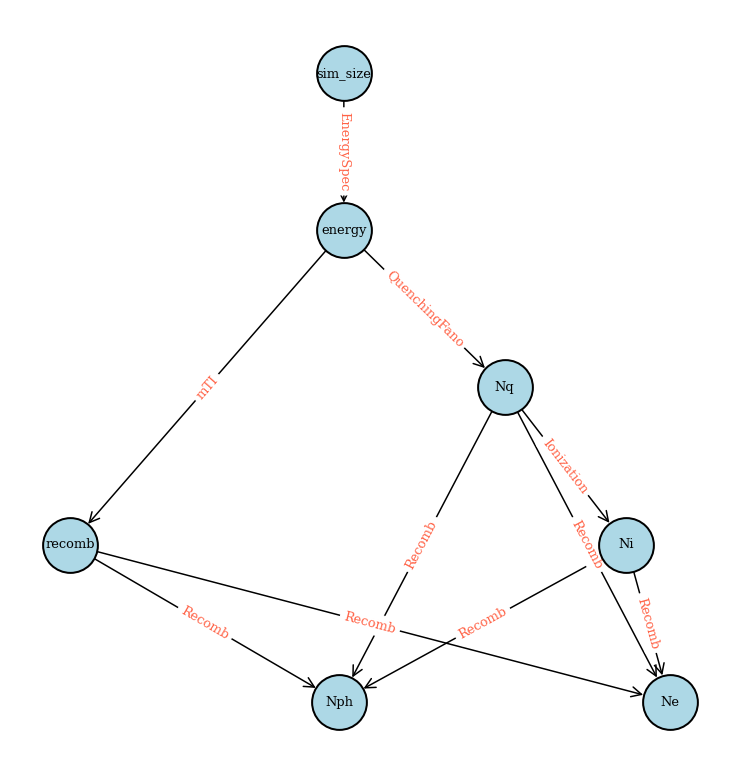

In [4]:
model = XENON1T_ERmTIModel(par_handler, 0., 20.)
plot_network(model.get_network_edges())

In [5]:
# When model is run for the first time, it takes longer time to cache it to device
Nph, Ne = model(100)

 Function <__call__> starts. 
 Function <__call__> ends! Time cost = 0.038186 sec. 


2022-04-29 13:45:51.309246: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# After caching, the kernel runs much faster
Nph, Ne = model(100)

 Function <__call__> starts. 
 Function <__call__> ends! Time cost = 0.003901 sec. 


In [7]:
# Change parameter
par_handler.set_parameter('w', 13.2e-3)
model.update_parameter_from_handler(par_handler)
Nph, Ne = model(100)

 Function <__call__> starts. 
 Function <__call__> ends! Time cost = 0.003571 sec. 
